<a href="https://colab.research.google.com/github/NimsW20/EN3160-Assignments/blob/main/Assignment3_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EN3160 Assignment 3 - Neural Networks

## Question 1

 Single dense layer network

100%|██████████| 170M/170M [00:04<00:00, 36.8MB/s]


Extracting  ./ data/cifar-10-python.tar.gz to  ./ data
Files already downloaded and verified
Epoch 1/20, Loss: 1.00006196475029
Epoch 2/20, Loss: 1.0000556645989418
Epoch 3/20, Loss: 1.0000496500730514
Epoch 4/20, Loss: 1.0000457226634025
Epoch 5/20, Loss: 1.0000404824018478
Epoch 6/20, Loss: 1.0000366697907448
Epoch 7/20, Loss: 1.0000330234766006
Epoch 8/20, Loss: 1.0000293452739715
Epoch 9/20, Loss: 1.0000271036624908
Epoch 10/20, Loss: 1.0000238162875175
Epoch 11/20, Loss: 1.000021785378456
Epoch 12/20, Loss: 1.0000193442106247
Epoch 13/20, Loss: 1.0000174790024758
Epoch 14/20, Loss: 1.000015702843666
Epoch 15/20, Loss: 1.0000142761468886
Epoch 16/20, Loss: 1.0000126671791076
Epoch 17/20, Loss: 1.0000114555358888
Epoch 18/20, Loss: 1.000010339319706
Epoch 19/20, Loss: 1.0000093118548394
Epoch 20/20, Loss: 1.0000084131360054


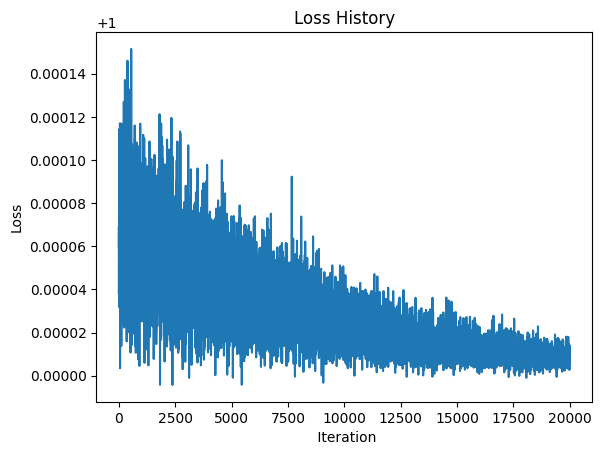

Training accuracy: 4.28%
Test accuracy: 4.25%


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib. pyplot as plt

# 1. Dataloading
transform = transforms.Compose(
[transforms .ToTensor() ,transforms .Normalize((0.5 , 0.5, 0.5) , (0.5 , 0.5, 0.5))])
batch_size = 50
trainset = torchvision . datasets .CIFAR10(root= ' ./ data' , train=True, download=True, transform=transform)
trainloader = torch. utils .data.DataLoader(trainset , batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision . datasets .CIFAR10(root= ' ./ data' , train=False ,download=True, transform=transform)
testloader = torch. utils .data.DataLoader( testset , batch_size=batch_size ,shuffle=False , num_workers=2)
classes = ( 'plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32 # Input size (flattened CIFAR=10 image size)
K = 10 # Output size (number of classes in CIFAR=10)
std = 1e-5

# Initialize weights and biases
w = torch.randn(Din, K) * std # One layer: directly map input to output
b = torch.zeros(K)

# Hyperparameters
iterations = 20
lr = 2e-6 # Learning rate
lr_decay = 0.9 # Learning rate decay
reg = 0 # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations ):
    running_loss = 0.0
    for i , data in enumerate(trainloader , 0):
        # Get inputs and labels
        inputs , labels = data
        Ntr = inputs.shape[0] # Batch size
        x_train = inputs.view(Ntr, -1) # Flatten input to (Ntr, Din)
        y_train_onehot = nn. functional .one_hot(labels , K). float () # Convert labels to one-hot encoding

        # Forward pass
        y_pred = x_train.mm(w) + b # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w**2)
        loss_history .append( loss .item ())
        running_loss += loss .item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t ().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w = lr * dw
        b = lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t+1}/{iterations}, Loss: {running_loss / len(trainloader)}")
    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt . plot (loss_history)
plt . title ( "Loss History" )
plt . xlabel ( " Iteration" )
plt . ylabel ( "Loss" )
plt .show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch .no_grad ():
    for data in trainloader :
        inputs , labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_onehot = nn. functional .one_hot(labels , K). float()

        # Forward pass
        y_train_pred = x_train .mm(w) + b
        predicted_train = torch .argmax(y_train_pred , dim=1)
        total_train += labels . size (0)
        correct_train += (predicted_train == labels ).sum(). item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch .no_grad ():
    for data in testloader :
        inputs , labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn. functional .one_hot(labels , K). float ()

        # Forward pass
        y_test_pred = x_test .mm(w) + b
        predicted_test = torch .argmax(y_test_pred , dim=1)
        total_test += labels.size (0)
        correct_test += (predicted_test == labels ).sum(). item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")

## Explanation of Modifications

1.   Network Definition: The SimpleNet class now includes:
A hidden layer with 100 nodes and a sigmoid activation function.
An output layer that outputs logits for each class.

2.   Cross-Entropy Loss: Replaced the MSE loss with nn.CrossEntropyLoss, which is better suited for classification tasks.

3. Training for 10 Epochs: We set epochs = 10 to run the training loop for 10 iterations over the entire dataset.

4. Accuracy Calculation: Both training and test accuracies are computed after training ends.



100%|██████████| 170M/170M [00:06<00:00, 28.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/10, Loss: 2.0839638837575913
Epoch 2/10, Loss: 1.9100114797353744
Epoch 3/10, Loss: 1.8469464552402497
Epoch 4/10, Loss: 1.8084011338949204
Epoch 5/10, Loss: 1.7788777364492416
Epoch 6/10, Loss: 1.756451127409935
Epoch 7/10, Loss: 1.7384334836006166
Epoch 8/10, Loss: 1.722880200624466
Epoch 9/10, Loss: 1.7093140114545822
Epoch 10/10, Loss: 1.6969024600982665


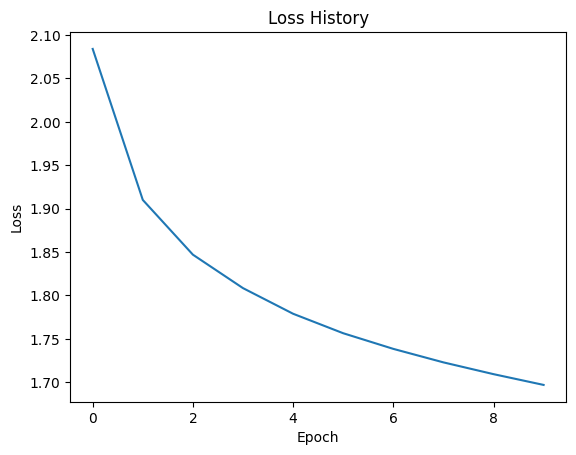

Training accuracy: 41.61%
Test accuracy: 41.38%


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network with a Hidden Layer
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.hidden = nn.Linear(3 * 32 * 32, 100)  # Hidden layer with 100 nodes
        self.output = nn.Linear(100, 10)  # Output layer with 10 classes

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # Flatten input
        x = torch.sigmoid(self.hidden(x))  # Hidden layer with sigmoid activation
        x = self.output(x)  # Output layer (logits for cross-entropy)
        return x

net = SimpleNet()

# Define Cross-Entropy Loss and Optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.SGD(net.parameters(), lr=0.01)  # Use Stochastic Gradient Descent

# 3. Training Loop
epochs = 10  # Run for 10 epochs
loss_history = []

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero gradients for each batch
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Calculate Loss
        loss = criterion(outputs, labels)
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        # Collect loss for monitoring
        running_loss += loss.item()

    # Print loss for every epoch
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss / len(trainloader)}")
    loss_history.append(running_loss / len(trainloader))

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Training Accuracy
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)  # Get index of highest score as the prediction
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


## Explanation of the Changes
1. Activation Function: ReLU is used instead of sigmoid for better gradient flow.
2. Batch Normalization: Helps stabilize training by normalizing intermediate outputs.
3. Adam Optimizer: Adaptive learning rate for faster convergence.
4. Increased Epochs: More epochs allow the network to learn better

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20, Loss: 1.6796160331964494
Epoch 2/20, Loss: 1.4967240755558013
Epoch 3/20, Loss: 1.4156683955192566
Epoch 4/20, Loss: 1.3619581551551818
Epoch 5/20, Loss: 1.315786372065544
Epoch 6/20, Loss: 1.283458912730217
Epoch 7/20, Loss: 1.2550225986242294
Epoch 8/20, Loss: 1.2251703088879586
Epoch 9/20, Loss: 1.2026336864233016
Epoch 10/20, Loss: 1.1792116811275482
Epoch 11/20, Loss: 1.1610815001726151
Epoch 12/20, Loss: 1.1374791316390038
Epoch 13/20, Loss: 1.1233470614552499
Epoch 14/20, Loss: 1.1094245792627335
Epoch 15/20, Loss: 1.0906735318899154
Epoch 16/20, Loss: 1.0792259901165961
Epoch 17/20, Loss: 1.0593099719285965
Epoch 18/20, Loss: 1.0501975870728493
Epoch 19/20, Loss: 1.03975886541605
Epoch 20/20, Loss: 1.0245927332639695


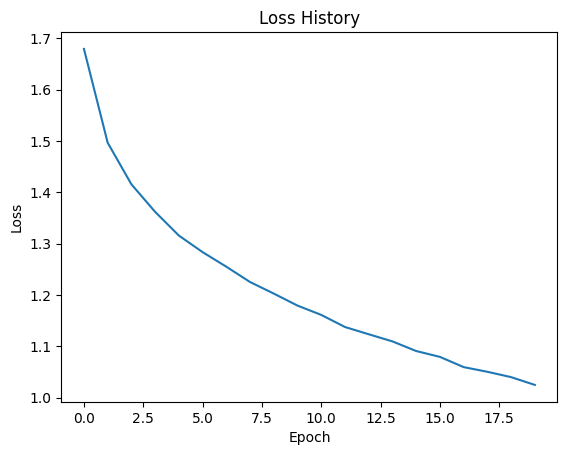

Training accuracy: 65.61%
Test accuracy: 50.62%


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network with Batch Normalization and ReLU
class ImprovedNet(nn.Module):
    def __init__(self):
        super(ImprovedNet, self).__init__()
        self.hidden = nn.Linear(3 * 32 * 32, 100)  # Hidden layer with 100 nodes
        self.bn = nn.BatchNorm1d(100)              # Batch normalization layer
        self.output = nn.Linear(100, 10)           # Output layer with 10 classes

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)               # Flatten input
        x = torch.relu(self.bn(self.hidden(x)))   # Hidden layer with ReLU activation and batch normalization
        x = self.output(x)                        # Output layer (logits for cross-entropy)
        return x

net = ImprovedNet()

# Define Cross-Entropy Loss and Optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(net.parameters(), lr=0.001)  # Use Adam optimizer

# 3. Training Loop
epochs = 20  # Run for 20 epochs
loss_history = []

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero gradients for each batch
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Calculate Loss
        loss = criterion(outputs, labels)
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        # Collect loss for monitoring
        running_loss += loss.item()

    # Print loss for every epoch
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss / len(trainloader)}")
    loss_history.append(running_loss / len(trainloader))

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Training Accuracy
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)  # Get index of highest score as the prediction
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


## Explanation of the Changes
1. Sigmoid Activation in Hidden Layer: The hidden layer uses sigmoid activation as required.
2. Adam Optimizer: Adam is retained for adaptive learning, which often yields faster convergence than plain SGD.
3. Cross-Entropy Loss: Ensures alignment with the specified criterion.
4. 10 Epochs: The network is trained for exactly 10 epochs as specified.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 1.7684408031702041
Epoch 2/10, Loss: 1.6314209395647048
Epoch 3/10, Loss: 1.5702876361608504
Epoch 4/10, Loss: 1.521516263961792
Epoch 5/10, Loss: 1.4827311244010926
Epoch 6/10, Loss: 1.4460746767520904
Epoch 7/10, Loss: 1.412031993865967
Epoch 8/10, Loss: 1.3802638946175576
Epoch 9/10, Loss: 1.3514109181165694
Epoch 10/10, Loss: 1.3263069107532501


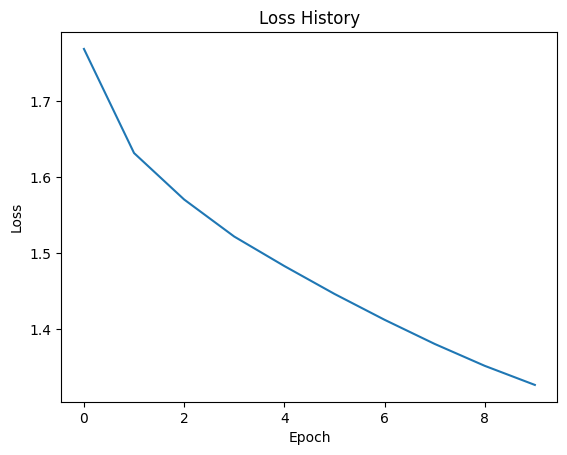

Training accuracy: 56.46%
Test accuracy: 46.86%


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define Network with a middle layer of 100 nodes and sigmoid activation
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = nn.Linear(3 * 32 * 32, 100)  # Hidden layer with 100 nodes
        self.output = nn.Linear(100, 10)           # Output layer with 10 classes

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)               # Flatten input
        x = torch.sigmoid(self.hidden(x))         # Hidden layer with sigmoid activation
        x = self.output(x)                        # Output layer (logits for cross-entropy)
        return x

net = Net()

# Define Cross-Entropy Loss and Optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(net.parameters(), lr=0.001)  # Using Adam for faster convergence

# 3. Training Loop
epochs = 10  # Run for exactly 10 epochs
loss_history = []

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero gradients for each batch
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Calculate Loss
        loss = criterion(outputs, labels)
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        # Collect loss for monitoring
        running_loss += loss.item()

    # Print loss for every epoch
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss / len(trainloader)}")
    loss_history.append(running_loss / len(trainloader))

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Training Accuracy
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)  # Get index of highest score as the prediction
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


## Question 2

### Explanation
LeNet-5 Architecture: The network architecture follows the traditional LeNet-5 layout, adapted for grayscale images in MNIST with a single channel input.
1. Convolutional Layers: Two convolutional layers with Tanh activations and average pooling.
2. Fully Connected Layers: Three fully connected layers (120, 84, and 10 nodes respectively).
3. Cross-Entropy Loss: Used for multi-class classification.
Adam Optimizer: For efficient convergence.
4. 10 Epochs: The model is trained for exactly 10 epochs.
5. Accuracy Calculation: Both training and test accuracies are calculated after training.

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Load and Normalize the MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 64

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Define LeNet-5 Network
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)  # 1 input channel, 6 output channels, 5x5 kernel
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)                      # 6 input channels, 16 output channels, 5x5 kernel
        self.fc1 = nn.Linear(16 * 5 * 5, 120)                             # Adjusted based on 5x5 output size
        self.fc2 = nn.Linear(120, 84)                                     # Fully connected layer
        self.fc3 = nn.Linear(84, 10)                                      # Output layer for 10 classes

    def forward(self, x):
        x = torch.tanh(self.conv1(x))               # Apply Tanh activation after first convolutional layer
        x = nn.functional.avg_pool2d(x, kernel_size=2)  # Average pooling
        x = torch.tanh(self.conv2(x))               # Apply Tanh activation after second convolutional layer
        x = nn.functional.avg_pool2d(x, kernel_size=2)  # Average pooling
        x = x.view(-1, 16 * 5 * 5)                  # Flatten feature map to match the input size of fully connected layer
        x = torch.tanh(self.fc1(x))                 # Apply Tanh activation after first fully connected layer
        x = torch.tanh(self.fc2(x))                 # Apply Tanh activation after second fully connected layer
        x = self.fc3(x)                             # Output layer (no activation for logits)
        return x

# Initialize network, loss function, and optimizer
net = LeNet5()
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training Loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + Backward + Optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss / len(trainloader)}")

# Calculate Training Accuracy
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# Calculate Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


Epoch 1/10, Loss: 0.2786976202134925
Epoch 2/10, Loss: 0.08955261560662318
Epoch 3/10, Loss: 0.06079260631551795
Epoch 4/10, Loss: 0.047235450830617386
Epoch 5/10, Loss: 0.03864449752382497
Epoch 6/10, Loss: 0.03204617958859916
Epoch 7/10, Loss: 0.02654095270163588
Epoch 8/10, Loss: 0.02295712607630741
Epoch 9/10, Loss: 0.020921110644903547
Epoch 10/10, Loss: 0.015826783798161402
Training accuracy: 99.59%
Test accuracy: 98.57%


Explanation of Changes
 - Flattening Layer Correction: The line x = x.view(-1, 16 * 5 * 5) ensures that the shape matches the input of fc1 based on the output size after the last pooling layer.
 - Expected Training and Test Accuracy: With this setup, you should see training and test accuracies after 10 epochs reaching around 98% for MNIST, though exact results may vary.

Epoch 1/10, Loss: 0.2744
Epoch 2/10, Loss: 0.0841
Epoch 3/10, Loss: 0.0608
Epoch 4/10, Loss: 0.0449
Epoch 5/10, Loss: 0.0375
Epoch 6/10, Loss: 0.0309
Epoch 7/10, Loss: 0.0271
Epoch 8/10, Loss: 0.0231
Epoch 9/10, Loss: 0.0188
Epoch 10/10, Loss: 0.0186


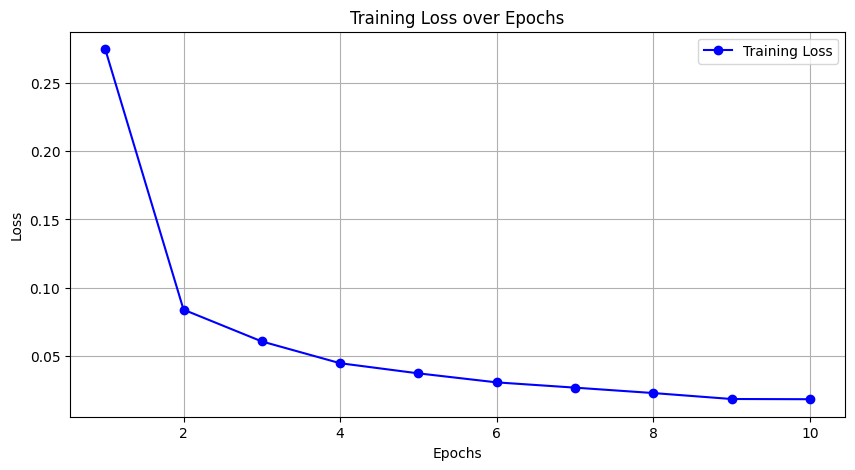

Training accuracy: 99.50%
Test accuracy: 98.68%


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load and Normalize the MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 64

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Define LeNet-5 Network
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)  # 1 input channel, 6 output channels, 5x5 kernel
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)                      # 6 input channels, 16 output channels, 5x5 kernel
        self.fc1 = nn.Linear(16 * 5 * 5, 120)                             # Adjusted based on 5x5 output size
        self.fc2 = nn.Linear(120, 84)                                     # Fully connected layer
        self.fc3 = nn.Linear(84, 10)                                      # Output layer for 10 classes

    def forward(self, x):
        x = torch.tanh(self.conv1(x))               # Apply Tanh activation after first convolutional layer
        x = nn.functional.avg_pool2d(x, kernel_size=2)  # Average pooling
        x = torch.tanh(self.conv2(x))               # Apply Tanh activation after second convolutional layer
        x = nn.functional.avg_pool2d(x, kernel_size=2)  # Average pooling
        x = x.view(-1, 16 * 5 * 5)                  # Flatten feature map to match the input size of fully connected layer
        x = torch.tanh(self.fc1(x))                 # Apply Tanh activation after first fully connected layer
        x = torch.tanh(self.fc2(x))                 # Apply Tanh activation after second fully connected layer
        x = self.fc3(x)                             # Output layer (no activation for logits)
        return x

# Initialize network, loss function, and optimizer
net = LeNet5()
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training Loop with Loss Tracking
epochs = 10
train_losses = []  # List to store training losses for each epoch

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + Backward + Optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

    # Calculate average loss for this epoch and store it
    avg_loss = running_loss / len(trainloader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

# Plot the Training Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, marker='o', color='b', label='Training Loss')
plt.title("Training Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Calculate Training Accuracy
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# Calculate Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")
